# ML_day2

# Colab에서 실행하기

https://colab.research.google.com/github/SLCFLAB/FinTech2021/blob/main/ML_day2.ipynb

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

### 데이터 특성 살펴보기

In [2]:
housing = pd.read_csv("./housing.csv")
housing.head()

longitude  latitude  ...  median_house_value  ocean_proximity
0    -122.23     37.88  ...            452600.0         NEAR BAY
1    -122.22     37.86  ...            358500.0         NEAR BAY
2    -122.24     37.85  ...            352100.0         NEAR BAY
3    -122.25     37.85  ...            341300.0         NEAR BAY
4    -122.25     37.85  ...            342200.0         NEAR BAY

[5 rows x 10 columns]

In [3]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [4]:
housing.describe()

longitude      latitude  ...  median_income  median_house_value
count  20640.000000  20640.000000  ...   20640.000000        20640.000000
mean    -119.569704     35.631861  ...       3.870671       206855.816909
std        2.003532      2.135952  ...       1.899822       115395.615874
min     -124.350000     32.540000  ...       0.499900        14999.000000
25%     -121.800000     33.930000  ...       2.563400       119600.000000
50%     -118.490000     34.260000  ...       3.534800       179700.000000
75%     -118.010000     37.710000  ...       4.743250       264725.000000
max     -114.310000     41.950000  ...      15.000100       500001.000000

[8 rows x 9 columns]

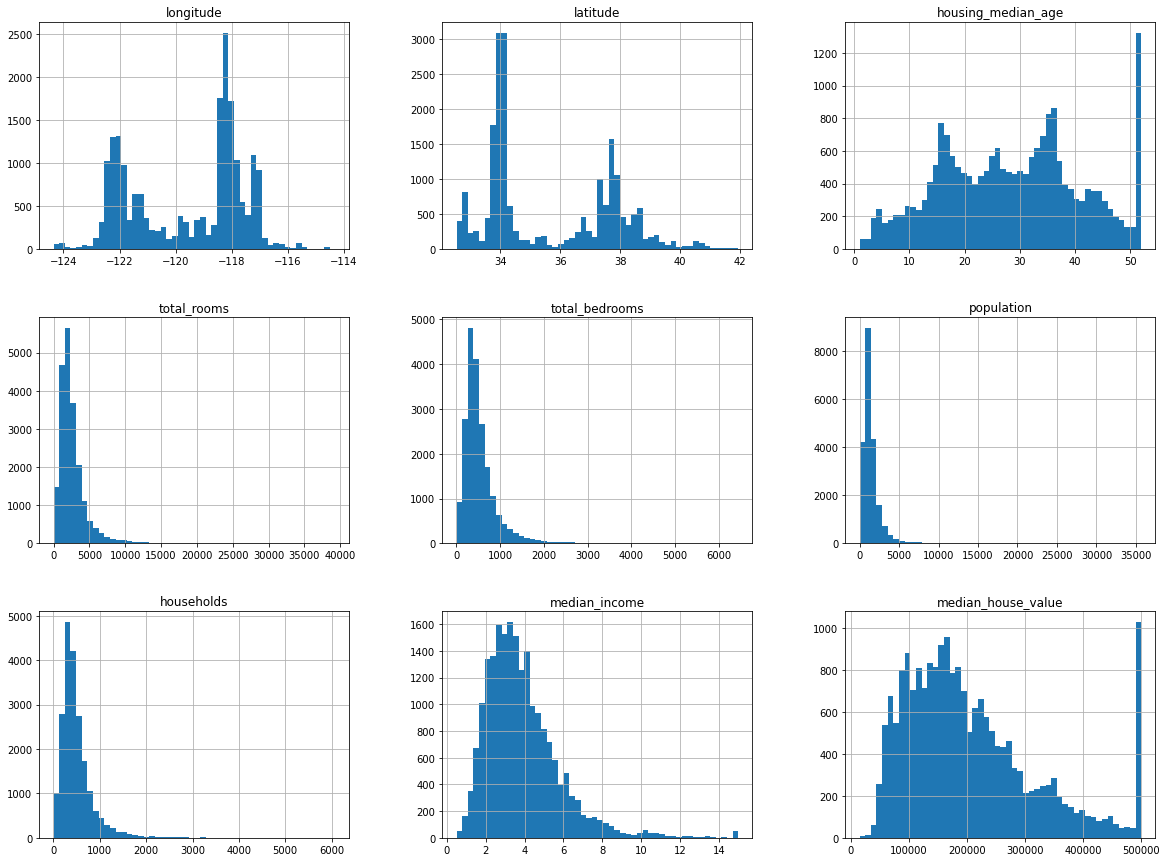

In [5]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

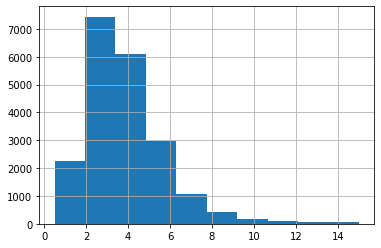

In [6]:
housing["median_income"].hist()

In [7]:
corr_matrix = housing.corr()

In [8]:
corr_matrix

longitude  latitude  ...  median_income  median_house_value
longitude            1.000000 -0.924664  ...      -0.015176           -0.045967
latitude            -0.924664  1.000000  ...      -0.079809           -0.144160
housing_median_age  -0.108197  0.011173  ...      -0.119034            0.105623
total_rooms          0.044568 -0.036100  ...       0.198050            0.134153
total_bedrooms       0.069608 -0.066983  ...      -0.007723            0.049686
population           0.099773 -0.108785  ...       0.004834           -0.024650
households           0.055310 -0.071035  ...       0.013033            0.065843
median_income       -0.015176 -0.079809  ...       1.000000            0.688075
median_house_value  -0.045967 -0.144160  ...       0.688075            1.000000

[9 rows x 9 columns]

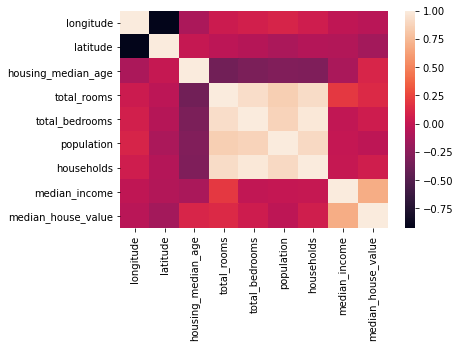

In [9]:
import seaborn as sns
sns.heatmap(corr_matrix)

### Missing value

In [10]:
housing['total_bedrooms'].isna()

0        False
1        False
2        False
3        False
4        False
         ...  
20635    False
20636    False
20637    False
20638    False
20639    False
Name: total_bedrooms, Length: 20640, dtype: bool

In [11]:
housing['total_bedrooms'].isna().sum()

207

In [12]:
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median, inplace=True)

In [13]:
housing['total_bedrooms'].isna().sum()

0

In [14]:
housing

longitude  latitude  ...  median_house_value  ocean_proximity
0        -122.23     37.88  ...            452600.0         NEAR BAY
1        -122.22     37.86  ...            358500.0         NEAR BAY
2        -122.24     37.85  ...            352100.0         NEAR BAY
3        -122.25     37.85  ...            341300.0         NEAR BAY
4        -122.25     37.85  ...            342200.0         NEAR BAY
...          ...       ...  ...                 ...              ...
20635    -121.09     39.48  ...             78100.0           INLAND
20636    -121.21     39.49  ...             77100.0           INLAND
20637    -121.22     39.43  ...             92300.0           INLAND
20638    -121.32     39.43  ...             84700.0           INLAND
20639    -121.24     39.37  ...             89400.0           INLAND

[20640 rows x 10 columns]

### min-max scaler

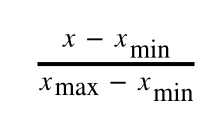

In [15]:
from sklearn.preprocessing import MinMaxScaler

data = housing[housing.columns[0:-1]]

# 0과 1사이로 분포를 transform
scaler = MinMaxScaler()
scaler.fit(data)
scaler.transform(data)

array([[0.21115538, 0.5674814 , 0.78431373, ..., 0.02055583, 0.53966842,
        0.90226638],
       [0.21215139, 0.565356  , 0.39215686, ..., 0.18697583, 0.53802706,
        0.70824656],
       [0.21015936, 0.5642933 , 1.        , ..., 0.02894261, 0.46602805,
        0.69505074],
       ...,
       [0.31175299, 0.73219979, 0.31372549, ..., 0.07104095, 0.08276438,
        0.15938285],
       [0.30179283, 0.73219979, 0.33333333, ..., 0.05722743, 0.09429525,
        0.14371281],
       [0.30976096, 0.72582359, 0.29411765, ..., 0.08699227, 0.13025338,
        0.15340349]])

### StandardScaler

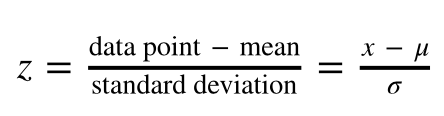

In [16]:
# 표준정규분포로 transform
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(data)
scaler.transform(data)


array([[-1.32783522,  1.05254828,  0.98214266, ..., -0.97703285,
         2.34476576,  2.12963148],
       [-1.32284391,  1.04318455, -0.60701891, ...,  1.66996103,
         2.33223796,  1.31415614],
       [-1.33282653,  1.03850269,  1.85618152, ..., -0.84363692,
         1.7826994 ,  1.25869341],
       ...,
       [-0.8237132 ,  1.77823747, -0.92485123, ..., -0.17404163,
        -1.14259331, -0.99274649],
       [-0.87362627,  1.77823747, -0.84539315, ..., -0.39375258,
        -1.05458292, -1.05860847],
       [-0.83369581,  1.75014627, -1.00430931, ...,  0.07967221,
        -0.78012947, -1.01787803]])

### 훈련 세트에서 훈련하고 평가하기

In [26]:
data = scaler.transform(data)

In [27]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

In [28]:
X_train, y_train = train_set[:,0:-1], train_set[:,-1]
X_test, y_test = test_set[:,0:-1], test_set[:,-1]

In [30]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

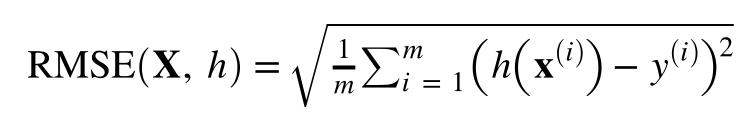

In [31]:
from sklearn.metrics import mean_squared_error

y_pred = tree_reg.predict(X_test)
y_true = y_test
rmse = np.sqrt(mean_squared_error(y_pred, y_true))
rmse

7.450984020999714e-11

## K-Fold Cross-Validation

In [32]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, X_train, y_train, cv=10)
scores

array([-6.64514790e-04, -7.67741312e-05, -1.39512755e-03, -9.33574059e-04,
       -7.66080419e-05, -1.26607517e-04, -1.06650883e-03, -7.17591157e-04,
       -4.29809772e-05, -6.80463017e-05])

In [35]:
rmse_scores = np.sqrt(-scores)
rmse_scores

array([0.02577818, 0.00876208, 0.03735141, 0.03055444, 0.0087526 ,
       0.011252  , 0.03265745, 0.02678789, 0.00655599, 0.00824902])

In [36]:
print("평균:", rmse_scores.mean())
print("표준편차:", rmse_scores.std())

평균: 0.0196701067216146
표준편차: 0.011398255901126725


## 하이퍼 파라미터 튜닝

In [42]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # 하이퍼파라미터 12(=3×4)개의 조합
    # n_estimators는 생성할 트리 개수
    {'max_depth': [10, 100, 1000], 'max_features': [2, 4, 6, 8]},
  ]

grid_search = GridSearchCV(tree_reg, param_grid, cv=5, return_train_score=True)


In [43]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'max_depth': [10, 100, 1000],
                          'max_features': [2, 4, 6, 8]}],
             pre_dispatch='2*n_jobs', ref

In [44]:
grid_search.best_params_

{'max_depth': 10, 'max_features': 2}